In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow import keras

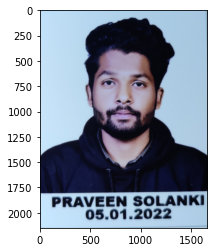

In [2]:
img = image.load_img("praveen.jpg")
plt.imshow(img)

In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory('myimage/training/', target_size=(200,200), batch_size=16, class_mode='binary')
validation_dataset = train.flow_from_directory('myimage/validation/', target_size=(200,200), batch_size=16, class_mode='binary')

Found 3471 images belonging to 2 classes.
Found 2085 images belonging to 1 classes.


In [5]:
train_dataset.class_indices
validation_dataset.class_indices

{'praveen': 0}

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [7]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),
metrics = ['accuracy'])

In [8]:
model_fit = model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 58s 27s/step - loss: 3.5329 - accuracy: 0.5000 - val_loss: 0.5388 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 20s 10s/step - loss: 0.7331 - accuracy: 0.4792 - val_loss: 0.8020 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 24s 11s/step - loss: 0.6571 - accuracy: 0.5208 - val_loss: 1.1514 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 23s 11s/step - loss: 0.6626 - accuracy: 0.4792 - val_loss: 1.6683 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 25s 12s/step - loss: 0.5341 - accuracy: 0.6667 - val_loss: 7.3008 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 24s 11s/step - loss: 0.6811 - accuracy: 0.7500 - val_loss: 0.9385 - val_accuracy: 0.2801
Epoch 7/10
3/3 [==============================] - 21s 10s/step - loss: 0.5398 - accuracy: 0.7708 - val_loss: 2.1045 - val_accuracy: 9.5923e-04
Epoch 8

In [9]:
model.save('myfacemodel.h5')

In [11]:
new_model = tf.keras.models.load_model('myfacemodel.h5')

In [12]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [13]:
model.save('my_face_model.h5')